<a href="https://colab.research.google.com/github/wolf71/TinyWebDav/blob/FirstVersion/Bench_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 功能和性能测试

In [1]:
import numpy as np 
import time
import math

bt = time.process_time()
n = 1000
for i in range(1):
	a = np.random.uniform(low=0., high=1., size=(n, n)).astype(np.float32)
#	a = np.zeros((n,n),order='C')
#	b = np.zeros((n,n),order='F')	
	b = np.random.uniform(low=0., high=1., size=(n, n)).astype(np.float32)
	a = np.dot(a,b) #a*b #a.dot(b)
	# np.dot(a,b,out=a)
print(('Numpy dot:',np.dot.__module__)) # _dotblas is fastest
print(('(%d * %d),Total Time:%.3f'%(n,n,time.process_time()-bt)))

start = time.process_time()
x = [i * 0.001 for i in range(10000000)]
for i, t in enumerate(x):
	x[i] = math.sin(t)
print(("math.sin:%.3f"%(time.process_time() - start)))

start = time.process_time()
y = [i * 0.001 for i in range(10000000)]
y = np.array(y)
print(("numpy.sin1:%.3f"%(time.process_time() - start)))
start = time.process_time()
np.sin(y,y)
print(("numpy.sin2:%.3f"%(time.process_time() - start)))
print('测试')


('Numpy dot:', 'numpy')
(1000 * 1000),Total Time:0.124
math.sin:3.901
numpy.sin1:1.672
numpy.sin2:0.201
测试


# 问题
- 考虑对于累加/累乘m次的n个正态分布随机数，得到的结果是什么分布？

# 结论
- 累加基本上得到的结果就是正态分布（不管数据是正态、均匀分布、幂律分布，最终结果都是正态分布）；
- 累乘基本上得到的都是幂律分布（不管数据集是正态、均匀分布、幂律分布，最终都是幂律分布）；
    - 正态分布导致迭代趋向比均匀分布更快；
    - 当分布取值范围在1附近（例如 1+/-0.2）,则会导致累乘的总体累加值远远小于累加模式；（！当存在奖励、惩罚的时候，累乘的总体效益比累加要低很多）
    - 当分布值都大于1（例如 2+/-0.2)，则累乘总体累加值远远大于累加模式；（！当所有都是奖励，只存在奖励大小差异，则累乘总体效益远大于累加）
    - 当分布范围在0附近（0+/-0.2)，累加模式的结果依然是正态分布，而累乘也依然是幂律分布，不过累乘的总体效益趋于0（最大值也是趋于0）

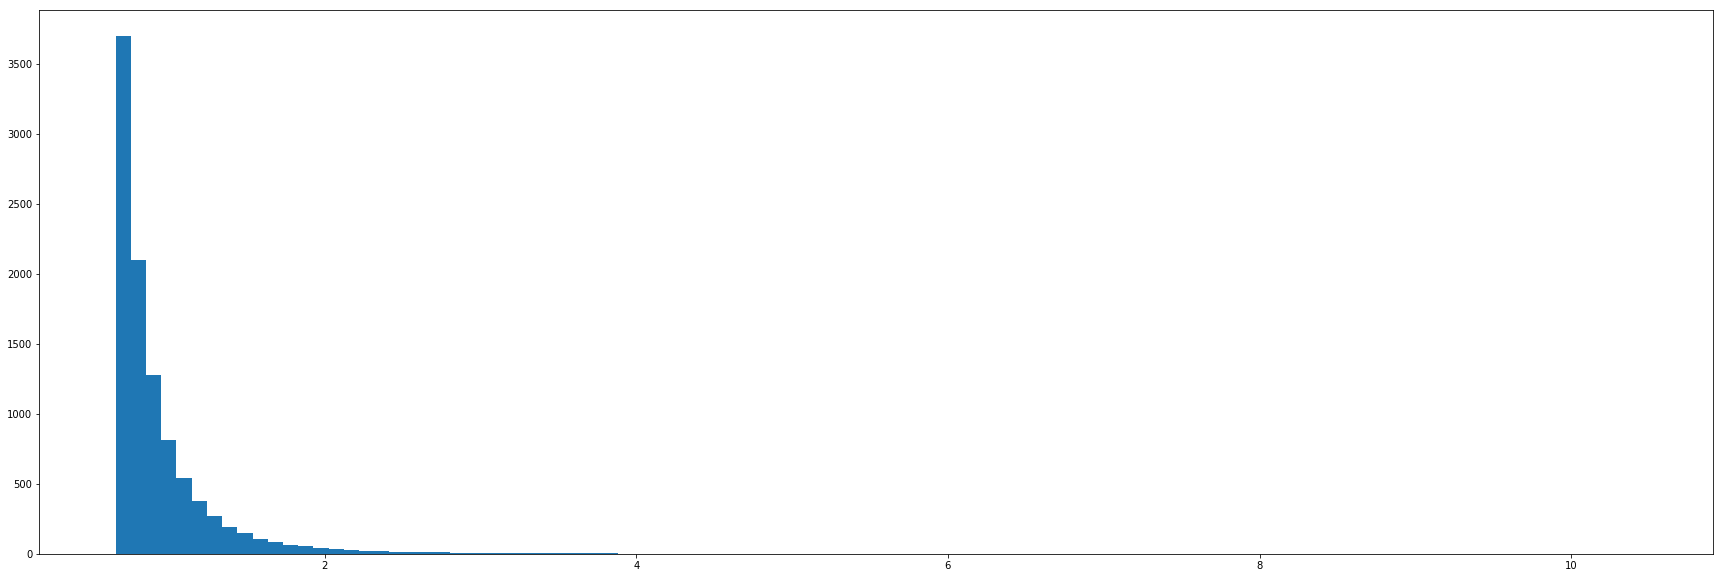

# 初始值（用幂律函数生成的标准幂律分布数据） : 最大值:10.424694,最小值:0.657754,平均值:0.938738,中位数:0.809766


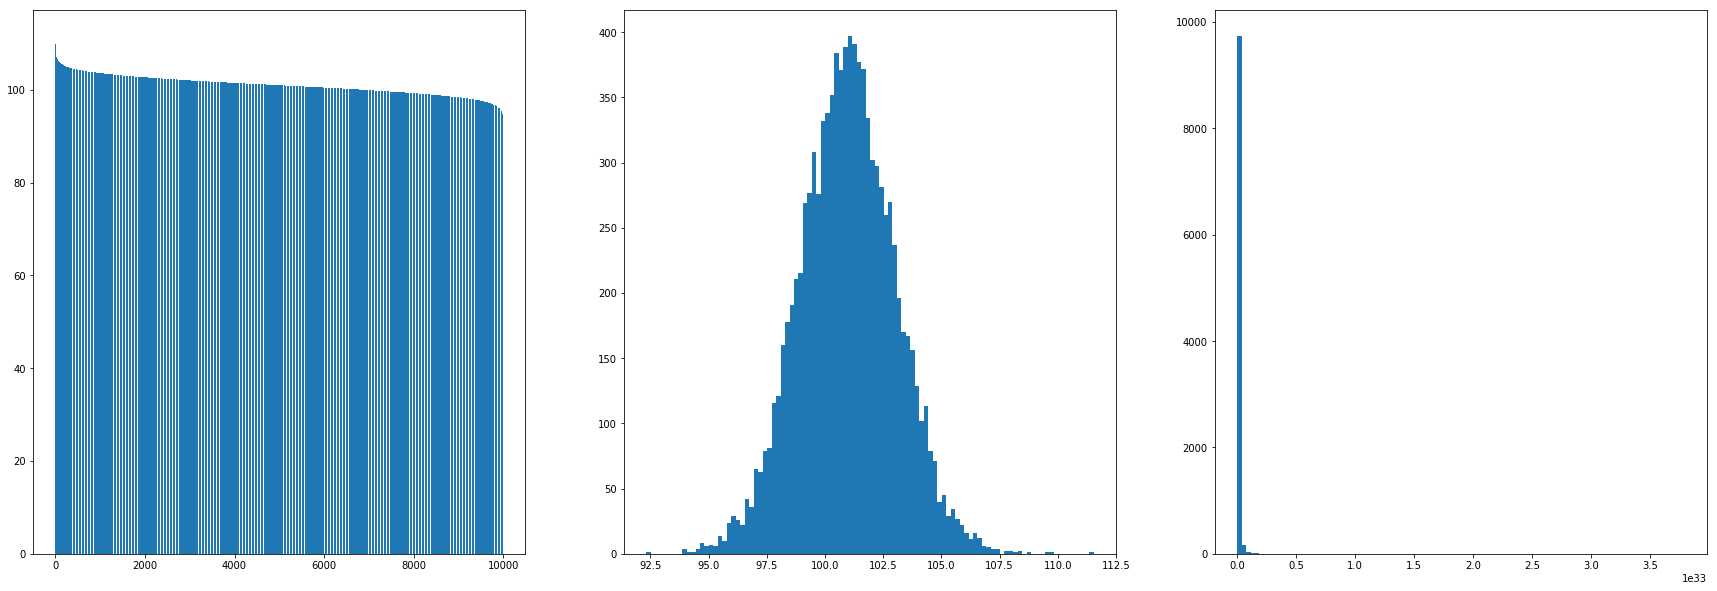

           图一: 数据按照从大到小排列绘制      图二：数据分布直方图        图三：数据进行指数化处理(x^2)后的分布直方图
# 初始数据进行多次累加  +：最大值:111.546684,最小值:92.326560,平均值:100.963955,中位数:100.967711


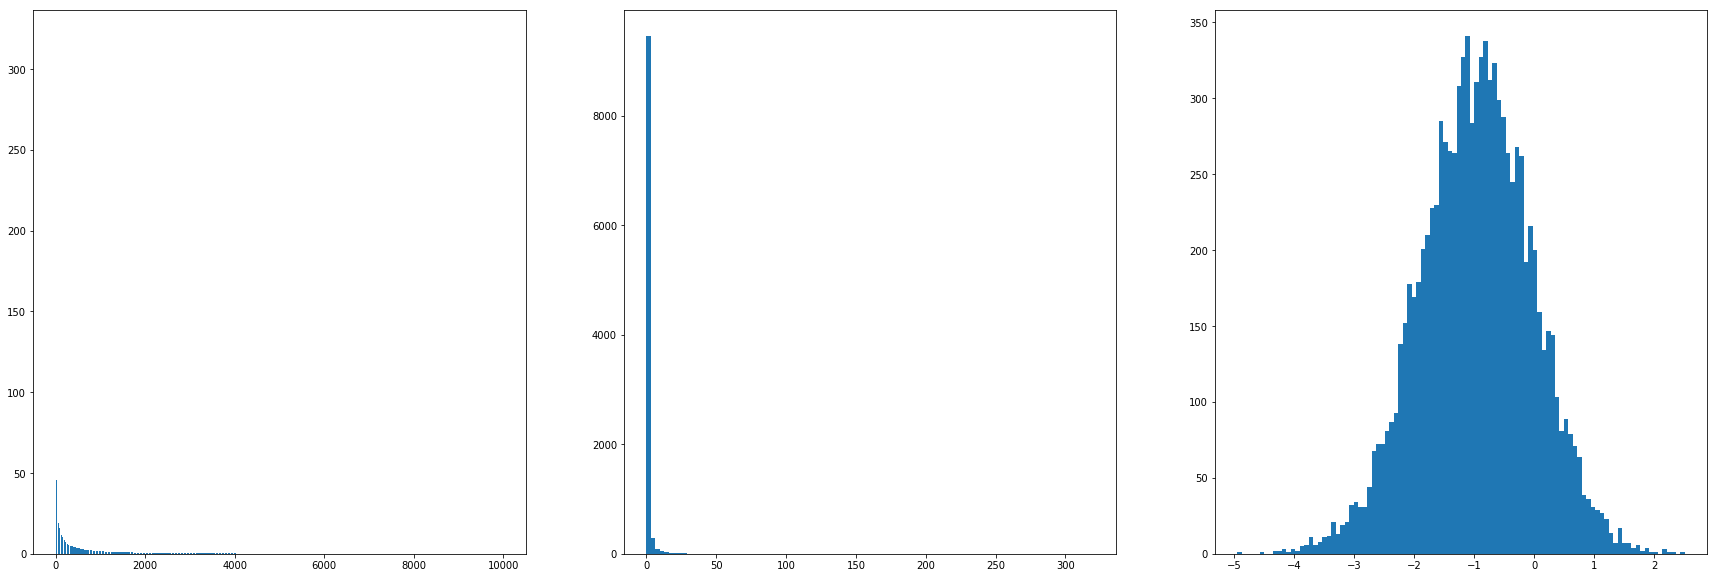

           图一: 数据按照从大到小排列绘制      图二：数据分布直方图        图三：数据进行对数化处理log10(x)后的分布直方图
# 初始数据进行多次累乘  *：最大值:320.480199,最小值:0.000011,平均值:0.985058,中位数:0.112052


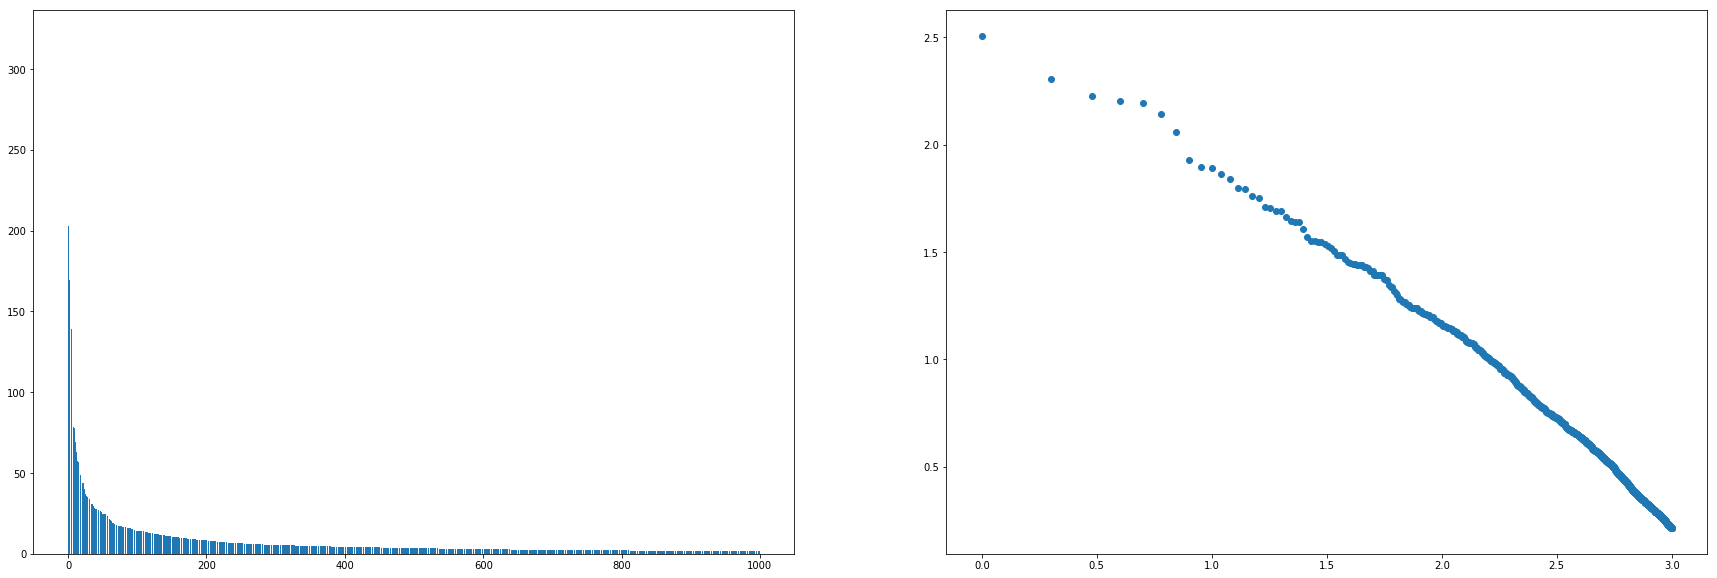

          图一： 对于累乘数据最大的前1000个从大到小绘制                   图二： 前1000个数据的双对数绘制
# 累乘后最大值序号:
 [8837 2838 4055 9945 3250 9386 9355 1593 8425 8831 8014 6960]
# 累乘后最大值:
 [320.48019864 202.74223275 169.19009154 160.40356052 155.99854648
 139.07677529 113.99366013  85.02708586  78.5419158   77.608826
  73.2385494   69.50212999]
# 累乘后最大值的初始值:
 [1.22448134 0.66560903 0.88534138 0.76087986 1.33527813 0.75030152
 0.86670133 0.71510366 1.13117751 2.55879921 0.66943718 0.86053695]


In [0]:
import numpy as np
from numpy.linalg import cholesky
import matplotlib.pyplot as plt

# 初始化参数
sampleNo = 10000		# 样本数量
cycle = 100					# 迭代次数
rand_type = 3				# 1-正态分布  2-均匀分布  3-幂律分布

# 生成正态分布的数据参数
mu = 1							# mu 此概率分布的均值（对应着整个分布的中心centre）
sigma = 0.2					# 此概率分布的标准差（对应于分布的宽度，scale越大越矮胖)

# 初始化随机数生成器
# 如果需要每次生成随机数一样，则可以加上seed(0)
# np.random.seed(0)		

#
#	生成幂律分布的随机数
# 调用参数：起始值，步长，样本数量
#
def Power_law(sampleNo,start=10,step=10):
	X = np.arange(start,step*sampleNo+step,step)
	pval = []
	# 根据幂律公式生成数据
	for i in range(sampleNo):
		pval.append(20.8*pow(X[i],-0.3))
	# 对数据进行随机化乱序
	random_state = np.random.RandomState()
	random_state.shuffle(pval)
	return pval

#
# 按照参数生成符合分布规律的随机数
#
def rand_data(type=1):
	if type == 1:
		return np.random.normal(mu, sigma, sampleNo )								# 正态分布  等效于 s0 = sigma * np.random.randn(sampleNo) + mu
	elif type == 2:
		return np.random.uniform(mu-sigma, mu+sigma, sampleNo )			# 均匀分布
	elif type ==3:
		return np.array(Power_law(sampleNo))												# 幂律分布
	
# 产生初始数据集
s0 = rand_data(rand_type)

# 绘制数据 
plt.figure(figsize=(30,10))
plt.hist(s0, 100, density=0)
plt.show()
plt.close()
print('# 初始值（用幂律函数生成的标准幂律分布数据） : 最大值:%f,最小值:%f,平均值:%f,中位数:%f'%(np.max(s0),np.min(s0),np.mean(s0),np.median(s0)))

#
# 累加/累乘迭代影响计算
#
s_add, s_mult = s0,s0
for i in range(cycle):
	s = rand_data()
	s_add = s_add + s
	s_mult = s_mult * s	

#
# 绘制累加数据 
#
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)		# 生成1行，3个的子图，现在是第 1 个 
# 数据按照从大到小排列 ，而后绘制图形 因为要从大到小，因此使用了 -np.sort(-xxx)
plt.bar(range(np.size(s_add)),-np.sort(-s_add))
# 绘制分布直方图
plt.subplot(1,3,2)		# 生成1行，3个的子图，现在是第 2 个 
plt.hist(s_add, 100, density=0) # density=1 进行归一化处理
# 绘制指数化处理后的分布图
plt.subplot(1,3,3)		# 生成1行，3个的子图，现在是第 3 个 
plt.hist(np.power(2,s_add), 100, density=0)		# 如果进行指数化，则分布变成幂律
plt.show()
plt.close('all')
print('           图一: 数据按照从大到小排列绘制      图二：数据分布直方图        图三：数据进行指数化处理(x^2)后的分布直方图')
print('# 初始数据进行多次累加  +：最大值:%f,最小值:%f,平均值:%f,中位数:%f'%(np.max(s_add),np.min(s_add),np.mean(s_add),np.median(s_add)))

#
# 绘制累乘数据
#
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)		# 生成1行，3个的子图，现在是第 1 个 
# 数据按照从大到小排列 ，而后绘制图形  因为要从大到小，因此使用了 -np.sort(-xxx)
plt.bar(range(np.size(s_mult)),-np.sort(-s_mult))
# 绘制分布直方图
plt.subplot(1,3,2)		# 生成1行，3个的子图，现在是第 2 个 
plt.hist(s_mult, 100, density=0)		# 如果取对数后，则变成正态分布了 plt.hist(np.log10(s_mult), 100, density=0)
# 绘制进行对数处理后的分布直方图
plt.subplot(1,3,3)		# 生成1行，3个的子图，现在是第 3 个 
plt.hist(np.log10(s_mult), 100, density=0)
plt.show()
plt.close('all')
print('           图一: 数据按照从大到小排列绘制      图二：数据分布直方图        图三：数据进行对数化处理log10(x)后的分布直方图')
print('# 初始数据进行多次累乘  *：最大值:%f,最小值:%f,平均值:%f,中位数:%f'%(np.max(s_mult),np.min(s_mult),np.mean(s_mult),np.median(s_mult)))


#
# 绘制具体数据分布
#
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)		# 生成1行，2个的子图，现在是第 1 个 
# bar参数（x轴,y轴)
# 用np.argsort 对数据进行排序 
# np.argsort 得到的是排序结果的数组序列号
# 默认是从小到大排序，如果需要从大到小，则只需要用 -数组 就可以
s_mult_sort = np.argsort(-s_mult)			#从大到小排序
# 获得排序后的具体值，则需要用 s_mult[s_mult_sort]
# 只显示头部数据就够了
if sampleNo > 100:
	showNo = sampleNo//10
else:
	showNo = sampleNo
plt.bar(np.arange(showNo), s_mult[s_mult_sort][:showNo])

# 验证幂律分布 
plt.subplot(1,2,2)		# 生成1行，2个的子图，现在是第 2 个 
plt.scatter(np.log10(np.arange(1,showNo+1)),np.log10(s_mult[s_mult_sort][:showNo]))
plt.show()
plt.close('all')

print('          图一： 对于累乘数据最大的前1000个从大到小绘制                   图二： 前1000个数据的双对数绘制')
print('# 累乘后最大值序号:\n',s_mult_sort[:12])
print('# 累乘后最大值:\n',s_mult[s_mult_sort][:12])
print('# 累乘后最大值的初始值:\n',s0[s_mult_sort][:12])



****** 投资类型:0,是否准许借贷:0,市场概率:0.500,初始资金:100.00,每次投资金额/比例:20.00 ******
# ♾系统赚取的利润:47320.00 ,占比 4.73%
# 最终资产: 最大值:3460.00,最小值:0.00,平均值:95.27,中位数:0.00,破产人数:9158,亏本人数:9163
# 有资产者统计: 人数:842,总额:952680.00,最大值:3460.00,最小值:20.00,平均值:1131.45,中位数:1080.00


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


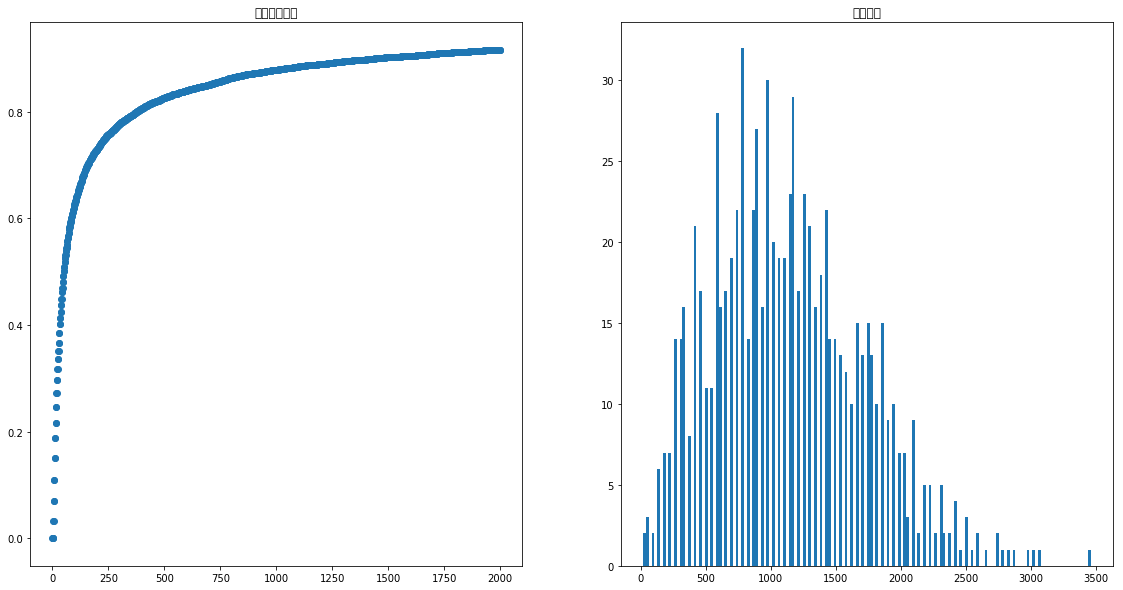


****** 投资类型:1,是否准许借贷:0,市场概率:0.505,初始资金:100.00,每次投资金额/比例:0.02 ******
# ♾系统赚取的利润:-473613.85 ,占比 -47.36%
# 最终资产: 最大值:3379.94,最小值:0.39,平均值:147.36,中位数:100.00,破产人数:0,亏本人数:5167
# 有资产者统计: 人数:10000,总额:1473613.85,最大值:3379.94,最小值:0.39,平均值:147.36,中位数:100.00


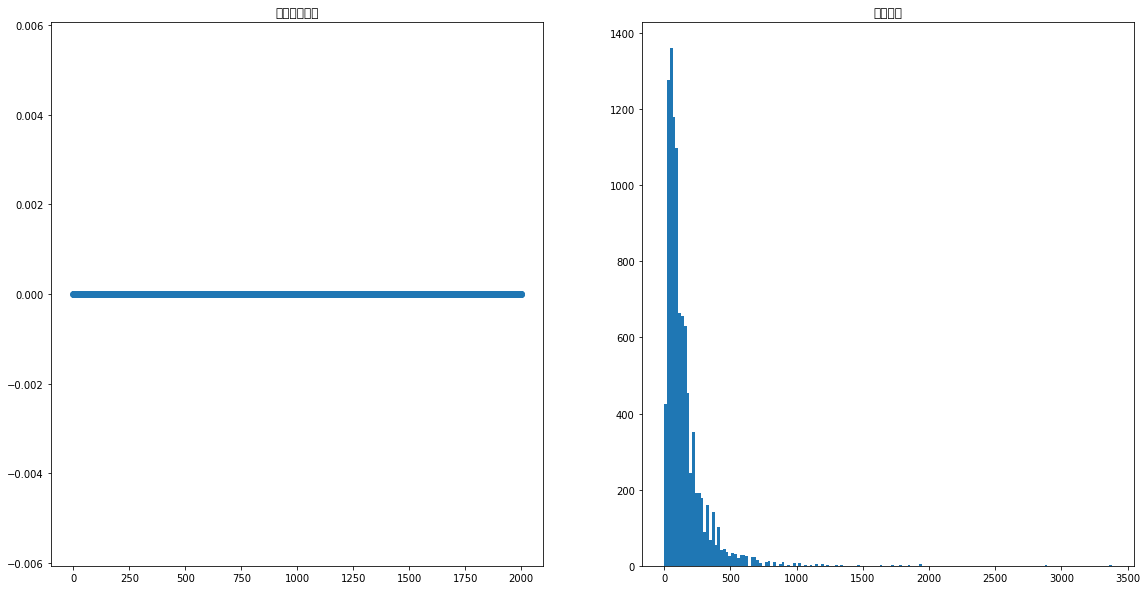


****** 投资类型:0,是否准许借贷:0,市场概率:0.495,初始资金:100.00,每次投资金额/比例:20.00 ******
# ♾系统赚取的利润:541520.00 ,占比 54.15%
# 最终资产: 最大值:3060.00,最小值:0.00,平均值:45.85,中位数:0.00,破产人数:9518,亏本人数:9521
# 有资产者统计: 人数:482,总额:458480.00,最大值:3060.00,最小值:20.00,平均值:951.20,中位数:860.00


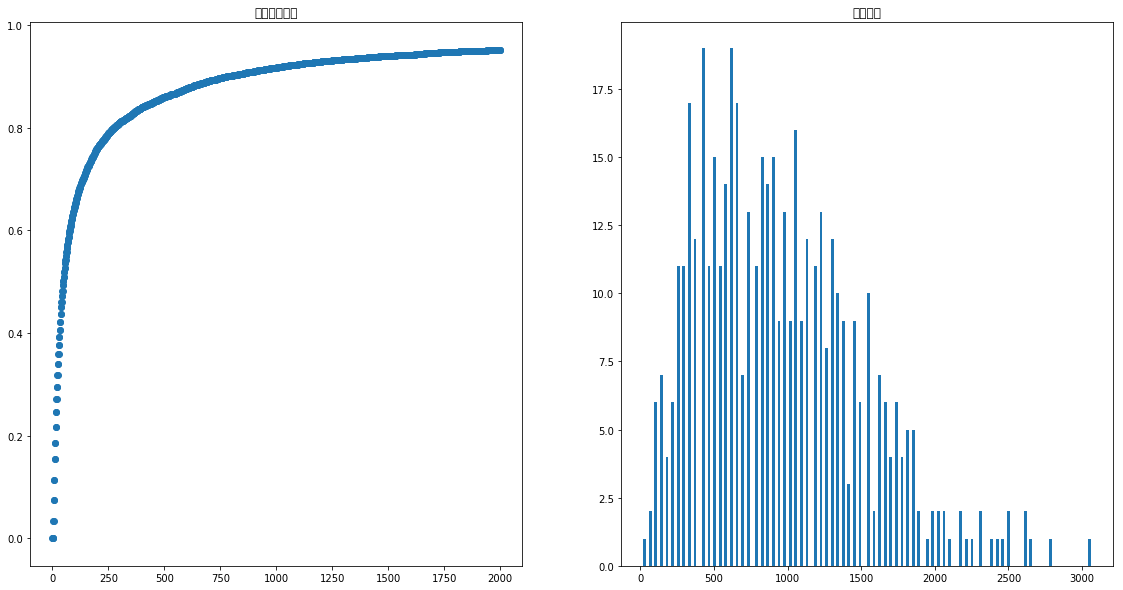

In [0]:
'''
	@2019/4/7 By LCJ on iPad Pro 11 Pythonista

	# 目标
	- 继续 201804的研究，并且结合在阅读的《非对称风险》提到的一些观点，希望进行验证
		1. 对于 非遍历性 的情况下（存在爆仓可能），整体的集合概率 和 个体的时间概率是不一样的；
			- 整体概率假设是 0.5，通过201804的测试，可以看到：
				- 当存在爆仓的情况下（个人资金耗尽被迫退出），哪怕从整体来看，还是会跑输系统（因为系统属于有无限资本进行博弈）；
				- 当允许无限、不收利息借贷的时候，才具有遍历性，这个时候大致能够做到 集合概率 大致等于 个体时间概率；
				- 基于固定投资的模式，最终群体特性属于正态分布；（对于不准许借贷的，资产分布；对于准许借贷的，负债和资产分布）
				- 以上属于零和博弈；
	- 新的实验
		- 动态变化的交易策略（支持按照最近盈利情况调整策略,调整金额或比例）
		- 交易策略混合模式（某些人采用累加、某些人采用累乘模式），而后统计不同策略的人的盈利统计情况；		
		- 股票交易模式 （大家相互交易模式）
		- 交易规则支持（收取交易费、收取利息等）
		- 有效的显示数据（包括动态展示过程） (Delay:景上添花类)
				
	# 疑问？
		- 多次重复的随机累加会导致正态分布；多次重复的随机累乘，会导致幂律分布；
		
		
	# Ref
	- 100个赌徒在一天时间里的成功概率（集合概率），并不适用于你在100天内的成功概率（时间概率）；
		- 如果一条河平均深度是1.5米（假设你刚好可以呼吸），那就千万不要过河！！！
		- 对于个人而言（时间概率），会存在爆仓的问题，一旦爆仓你就没有后续的机会了！！！
		- 如果一个策略有可能触发爆仓风险，那么无论有多么大的收益都得不偿失；
	- 为了使某项投资策略实现遍历性并最终跟上指数的收益，代理人应当在盈利的时候采取激进策略追加投资，而在遭受损失的时候采取保守策略缩减投资，这个方法被称为“赌场盈利效应”；实践中常采用设置阀值来实现；
				
					
'''

import numpy as np
#from numpy.linalg import cholesky
import matplotlib.pyplot as plt
# 设置 matplotlib 中文字体
#import matplotlib.font_manager as fm
#fp = fm.FontProperties(fname = "/System/Library/Fonts/LanguageSupport/PingFang.ttc")

#
# 初始化参数
#
sampleNo = 10000					# 样本数量
cycle = 2000							# 迭代次数
invest_limit = 0.1				# 每次投资最小金额


#
# 投资策略函数
#  参数：投资者资金数据集,投资类型,是否允许借贷
#
# 扩充：需要支持更灵活的动态策略，例如如果连这赢了多次，则加大投入比例；如果连输几次，则降低比例等；
#
# 
def Astrategy(indata,s_type,strategy_P,s_enable):
	if s_type == 1:
		outdata = indata * strategy_P
		# 对于按比例投资，如果不设定最小投资额，则会由于浮点数计算的精度问题导致永远会有剩余，所以需要做最小投资额判断
		# 判断如果投资额度小于最小投资，则将投资额度设置为最小投资
		outdata = np.where(outdata < invest_limit , invest_limit ,outdata)		
	else:
		outdata = strategy_P
														
	# 如果不准许借贷，则将剩余资金小于投资资金的人，投资金额设为当前金额
	if not s_enable:
		inx = np.where(indata < outdata)			# inx 里面保存的是 自由资金 < 投资金额 的数组序列ID
		outdata[inx] = indata[inx]						# 将那些超额的，投资金额设置为剩余金额 
		
	# 返回数据
	return outdata

#
# 市场获利概率函数
#
# 扩充：不仅仅支持输赢概率，还需要支持每次输赢的比例 
# 
def Amarket(market_prob=0.5):
	# 按照市场获利概率生成随机数
	market = np.random.binomial(size=sampleNo, n=1, p=(market_prob))
	# 根据随机数计算输赢，而后设置+/-
	return np.where(market == 0, -1, market)
		
			
#
# 投资模拟函数
# 	参数：type:0-固定投资额,1-按比例投资; borrow:0-不准许借贷,1-准许借贷；market_prob:市场输赢概率(>0.5则用户赢面大)；
#				 def_money:初始资金数；i_money:每次投资金额(type=0，则是具体金额；type=1，则是当前资金的比例)；draw_flag 是否绘图
#
def invest(type,borrow,market_prob,def_money,i_money,draw_flag=False):
	# 数据准备
	strategy_P = np.zeros(sampleNo)
	strategy_P = np.where(strategy_P == 0, i_money, 0)
	
	# 产生投资人数组
	human = np.zeros(sampleNo)
	# 将所有值设置为固定的初始值
	human = np.where(human == 0, def_money, 0)
	
	# 初始化每轮破产人数
	lost_cnt = np.zeros(cycle)					
					
	for i in range(cycle):
		# 投资收益计算
		human = human + Astrategy(human,type,strategy_P,borrow) * Amarket(market_prob)
		# 计算近几轮投资收益情况 （2% 3% -3%
		# ROE = 
		
		# 统计本轮破产人数 （扩充：需要支持统计负资产人数）
		lost_cnt[i] = np.where(human <= 0)[0].size
	
	#
	# 显示计算结果
	#
	print('\n****** 投资类型:%d,是否准许借贷:%d,市场概率:%.3f,初始资金:%.2f,每次投资金额/比例:%.2f ******'%(type,borrow,market_prob,def_money,i_money))
	# 亏本人数
	c_lost = np.where(human < 100)[0].size		
	# 系统获取的收入
	sys_fee = sampleNo * def_money - np.sum(human)
	print('# ♾系统赚取的利润:%.2f ,占比 %.2f%%'%(sys_fee,sys_fee * 100.0/(sampleNo * def_money)))
	print('# 最终资产: 最大值:%.2f,最小值:%.2f,平均值:%.2f,中位数:%.2f,破产人数:%d,亏本人数:%d'%(np.max(human),np.min(human),np.mean(human),np.median(human),lost_cnt[-1],c_lost))
	# 统计有资产者数据
	human1 = human[np.where(human > 0)]
	if human1.size > 0 :
		print('# 有资产者统计: 人数:%d,总额:%.2f,最大值:%.2f,最小值:%.2f,平均值:%.2f,中位数:%.2f'%(human1.size,np.sum(human1),np.max(human1),np.min(human1),np.mean(human1),np.median(human1)))
	# 统计负资产者数据		
	human2 = human[np.where(human < 0)]
	if human2.size > 0 :
		print('# 负债者统计: 人数:%d,总额:%.2f,最大值:%.2f,最小值:%.2f,平均值:%.2f,中位数:%.2f'%(human2.size,np.sum(human2),np.max(human2),np.min(human2),np.mean(human2),np.median(human2)))
	
	#
	# 绘制图表
	#
	if draw_flag:
		plt.figure(figsize=(30,10))
		plt.subplot(1,3,1)	
		plt.title('破产人数占比' )
		# 显示每轮过后，破产人数占总体人数的比例
		plt.scatter(range(cycle),lost_cnt/sampleNo)		
		# 显示资产分布情况
		if human1.size > 0 :
			plt.subplot(1,3,2)							
			plt.title('资产分布' )			
			# plt.hist(human,160, normed=0)	
			plt.hist(human[np.where(human > 0)],160, normed=0)		# 排除掉破产的人，看看分布
		# 显示负债分布情况
		if human2.size >0:
			plt.subplot(1,3,3)							
			plt.title('负债分布' )			
			plt.hist(human[np.where(human < 0)],160, normed=0)			
			
		plt.show()		
		plt.close('all')
		
		
#
# 主程序
#
invest(0,0,0.5,100.0,20.0,True)
invest(1,0,0.505,100.0,0.02,True)
invest(0,0,0.495,100.0,20.0,True)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


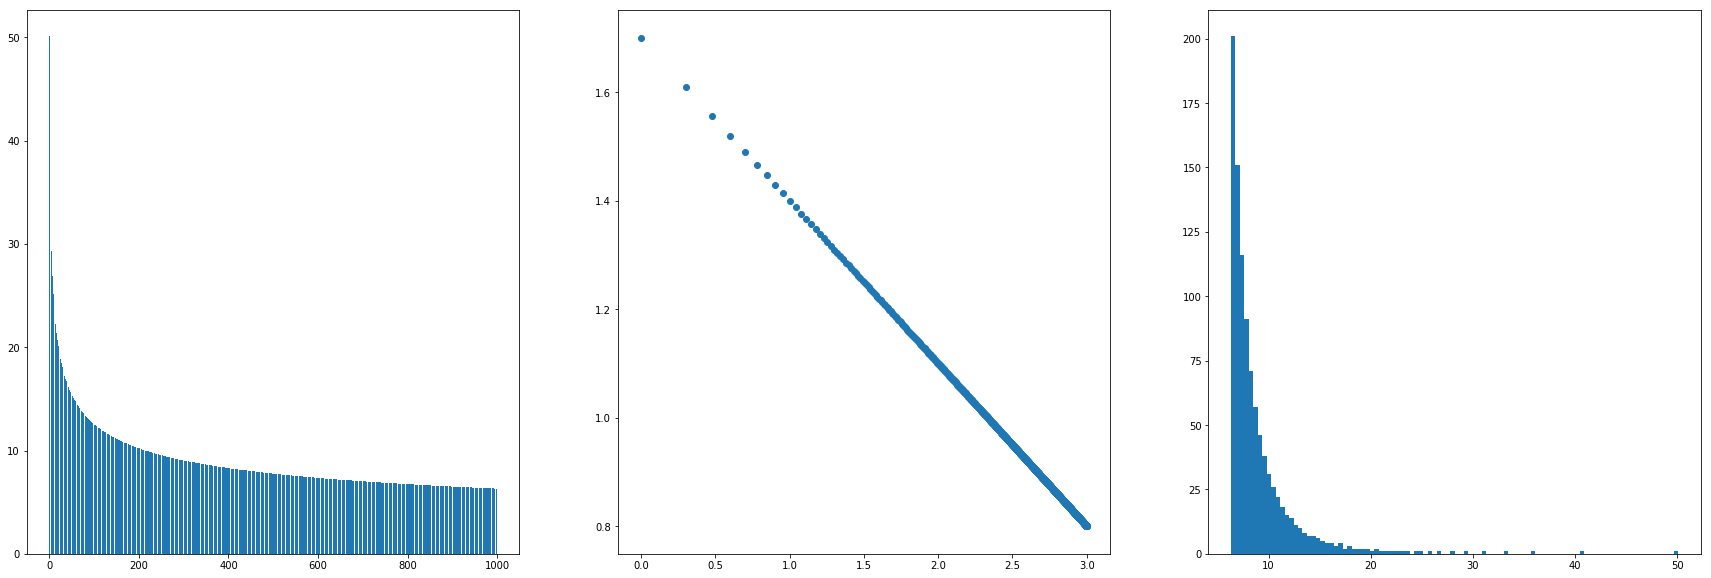

In [0]:
import numpy as np
import matplotlib.pyplot as plt

#
#	生成幂律分布的随机数
# 调用参数：起始值，步长，样本数量
#
def Power_low(start,step,sampleNo):
	X = np.arange(start,step*sampleNo+step,step)
	pval = []
	# 根据幂律公式生成数据
	for i in range(sampleNo):
		pval.append(100*pow(X[i],-0.3))
	# 对数据进行随机化乱序
	# random_state = np.random.RandomState()
	# random_state.shuffle(pval)
	return pval
	
#print (Power_low(10,10,100))

nn = 1000
pl = Power_low(10,10,nn)
# 绘制具体数据分布
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)		# 生成1行，2个的子图，现在是第 1 个 
plt.bar(np.arange(nn),pl)

# 验证幂律分布 
plt.subplot(1,3,2)		# 生成1行，2个的子图，现在是第 2 个 
plt.scatter(np.log10(np.arange(1,nn+1)),np.log10(pl))

# 分布图
plt.subplot(1,3,3)
plt.hist(pl, 100, normed=0)

plt.show()
plt.close()


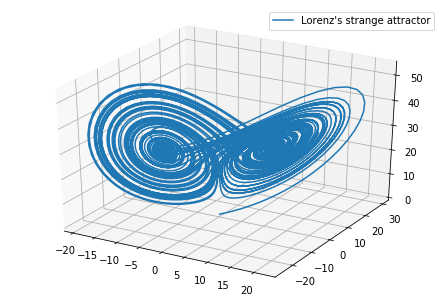

In [0]:
"洛伦兹吸引子 Lorenz's strange attractor"

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

xs, ys, zs = [], [], [] 

def mkPoints():
	a, b, c = 10.0, 28.0, 8.0 / 3.0
#	a, b, c = 10.0, 28.0, 2.9
	h = 0.01
	x0, y0, z0 = 0.1, 0, 0
	for i in range(10000):
		x1 = x0 + h * a * (y0 - x0)
		y1 = y0 + h * (x0 * (b - z0) - y0)
		z1 = z0 + h * (x0 * y0 - c * z0)
		x0, y0, z0 = x1, y1, z1
		xs.append(x0)
		ys.append(y0)
		zs.append(z0)
		
if __name__ == "__main__":
	mpl.rcParams["legend.fontsize"] = 10
	fig = plt.figure()
	ax = Axes3D(fig)
	
	mkPoints()
	ax.plot(xs, ys, zs, label = "Lorenz's strange attractor")
	ax.legend()
	
	plt.show()


In [3]:
!pip install biopython



     |████████████████████████████████| 2.2MB 2.8MB/s 


In [0]:
from Bio import Entrez
from Bio import SeqIO
import os

Entrez.email = "wolf71@gmail.com"
hd1 = Entrez.efetch(db="nucleotide",id=['NC_030915'],rettype='gb')
seq = SeqIO.read(hd1,'gb')
fw = open('NC_030915.gb','w')
SeqIO.write(seq,fw,'gb')
fw.close()


In [5]:
from Bio import SeqIO
record = SeqIO.read("NC_030915.gb", "gb")
print(record.annotations.keys())
print(record.annotations['source'])

print('===='*10)

for seq_record in SeqIO.parse("NC_030915.gb", "gb"):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))

dict_keys(['molecule_type', 'topology', 'data_file_division', 'date', 'accessions', 'sequence_version', 'keywords', 'source', 'organism', 'taxonomy', 'references', 'comment', 'structured_comment'])
Gordonia phage Orchid
NC_030915.1
Seq('ACTCGAATTTCTCGCATTTACTTTTGTTTTGAATTCGCGCGAAATTCGATCAGC...CTC', IUPACAmbiguousDNA())
80650


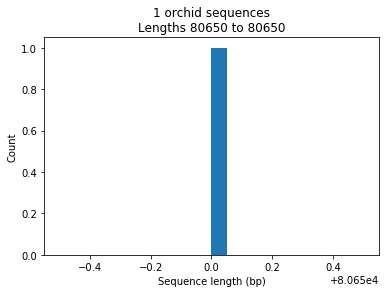

In [6]:
from Bio import SeqIO
sizes = [len(rec) for rec in SeqIO.parse("NC_030915.gb", "gb")]

import pylab
pylab.hist(sizes, bins=20)
pylab.title("%i orchid sequences\nLengths %i to %i" % (len(sizes),min(sizes),max(sizes)))
pylab.xlabel("Sequence length (bp)")
pylab.ylabel("Count")
pylab.show()

In [0]:
import random
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO

def make_shuffle_record(record, new_id):
    nuc_list = list(record.seq)
    random.shuffle(nuc_list)
    return SeqRecord(Seq("".join(nuc_list), record.seq.alphabet), \
           id=new_id, description="Based on %s" % original_rec.id)

original_rec = SeqIO.read("NC_030915.gb","genbank")
shuffled_recs = (make_shuffle_record(original_rec, "Shuffled%i" % (i+1)) \
                 for i in range(30))
handle = open("shuffled.fasta", "w")
SeqIO.write(shuffled_recs, handle, "fasta")
handle.close()